In [2]:
! pip install pandas_datareader

     ---------------------------------------- 0.0/109.5 kB ? eta -:--:--
     --- ------------------------------------ 10.2/109.5 kB ? eta -:--:--
     -------------------------------------- 109.5/109.5 kB 2.1 MB/s eta 0:00:00


In [3]:
import pandas_datareader.data as web

In [6]:
! pip install mpl_finance

In [8]:
!pip install --upgrade mplfinance

  Obtaining dependency information for mplfinance from https://files.pythonhosted.org/packages/d7/d9/31c436ea7673c21a5bf3fc747bc7f63377582dfe845c3004d3e46f9deee0/mplfinance-0.12.10b0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/75.0 kB ? eta -:--:--
   ---------------------------------------- 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [12]:
import pandas_datareader.data as web
import datetime
import matplotlib.pyplot as plt
import mpl_finance
import matplotlib.ticker as ticker

In [13]:
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

In [2]:
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/1b/0f/77716aa9dd84bb1aa5e93c87122af1de89697b6231f6d01d58d4e7c03c14/yfinance-0.2.36-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     --- ------------------------------------ 30.7/314.6 kB ? eta -:--:--
     -------------------------------------- 314.6/314.6 kB 6.5 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     ------------------- -------------------- 1.4/2.9 MB 43.8 MB/s eta 0:00:01
     ---------------------------------------  2.9/2.9 MB 36.4 MB/s eta 0:00:01
     ---

[*********************100%%**********************]  1 of 1 completed


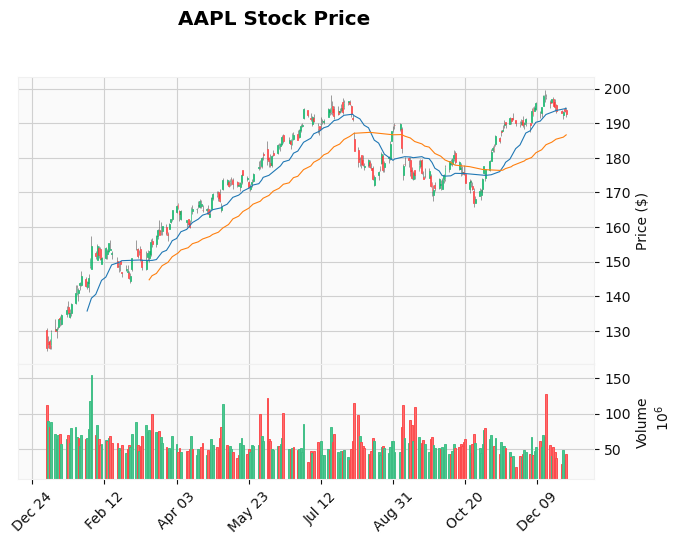

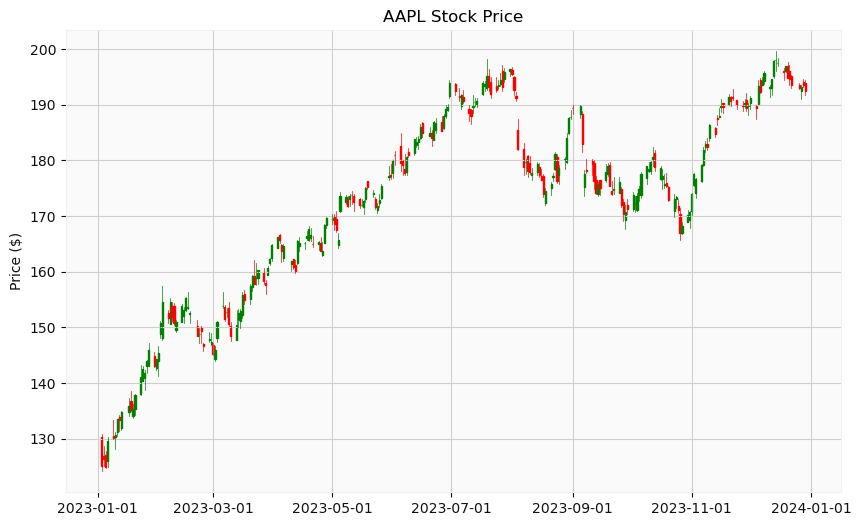

In [4]:
import pandas as pd
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import yfinance as yf
import matplotlib.pyplot as plt

# 주식 데이터 다운로드 (예시로 'AAPL' 사용)
symbol = 'AAPL'
start_date = '2023-01-01'
end_date = '2023-12-31'
stock_data = yf.download(symbol, start=start_date, end=end_date)

# 데이터 프레임을 날짜 형식에 맞게 변환
stock_data.index = pd.to_datetime(stock_data.index)

# Matplotlib Finance를 사용하여 캔들스틱 차트 그리기
mpf.plot(stock_data, type='candle', style='yahoo', title=f'{symbol} Stock Price', ylabel='Price ($)', ylabel_lower='Volume', volume=True, mav=(20, 50), show_nontrading=True)

# 또는 matplotlib와 mplfinance를 조합하여 캔들스틱 차트 그리기
fig, ax = plt.subplots(figsize=(10, 6))
candlestick_ohlc(ax, zip(mdates.date2num(stock_data.index.to_pydatetime()), stock_data['Open'], stock_data['High'], stock_data['Low'], stock_data['Close']), width=0.6, colorup='g', colordown='r')
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.set_title(f'{symbol} Stock Price')
ax.set_ylabel('Price ($)')
plt.show()